In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/KNN/train_knn.txt"
df = pd.read_csv(path, sep="," , dtype = 'int32', names=['x1', 'x2', 'label'], header = None)
df

,x1,x2,label
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1
7,3,4,2
8,2,3,2
9,3,2,2


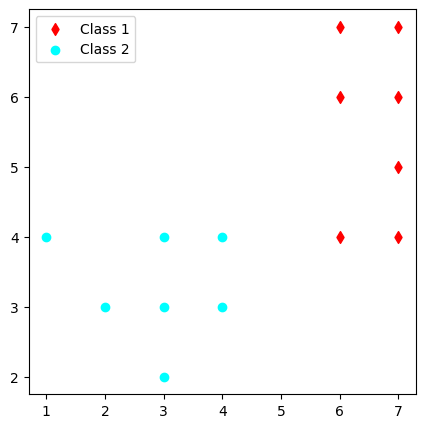

In [5]:
# Plotting datapoints
#`Diamond` shapes pointes are lies in label 1 and `round` shapes pointes are lies in label 2.

class1_color = 'red'
class2_color = 'cyan'

plt.figure(figsize=(5, 5))
plt.scatter(x=df[df['label'] == 1]['x1'], y=df[df['label'] == 1]['x2'], marker='d', label='Class 1', c=class1_color)
plt.scatter(x=df[df['label'] == 2]['x1'], y=df[df['label'] == 2]['x2'], marker='o', label='Class 2', c=class2_color)

plt.legend()

plt.show()

In [6]:
# KNN

def distance_measure(x, y):
  return (x[0] - y[0])**2 + (x[1] - y[1])**2

In [7]:
def knn(p, k):
  dp= np.array(df)

  dist = []

  for point in dp:
    dist.append((distance_measure(p, point), point[-1]))

  dist.sort()
  dist = np.array(dist)
  c = Counter(dist[:k, 1])
  return int(c.most_common()[0][0]), dist[:k]

In [8]:
# Reading the test points

path = '/content/drive/MyDrive/KNN/test_knn.txt'
df_test = pd.read_csv(path, sep="," , dtype = 'int32', names=['x1', 'x2'], header = None)
df_test

,x1,x2
0,3,7
1,7,7
2,4,3
3,2,8
4,3,5
5,1,2
6,4,8
7,8,3
8,8,4


In [11]:
k = 3

testPoints = np.array(df_test)
predictions = []

saving_path = '/content/drive/MyDrive/KNN/prediction.txt'

with open(saving_path, 'w') as f:
  for point in testPoints:
    class_label, distance = knn(point, k)

    print(f'Test point: {point[0]}, {point[1]}')
    f.write(f'Test point: {point[0]}, {point[1]}\n')

    for ind, d in enumerate(distance, start=1):
      print(f'Distance {ind}: {d[0]}    Class: {d[1]}')
      f.write(f'Distance {ind}: {d[0]}    Class: {d[1]}\n')

    print(f'Predicted class: {class_label}')
    f.write(f'Predicted class: {class_label}\n')
    f.write('\n')
    print()
    predictions.append([point[0], point[1], class_label])

predictions = np.array(predictions)

Test point: 3, 7
Distance 1: 9    Class: 1
Distance 2: 9    Class: 2
Distance 3: 10    Class: 1
Predicted class: 1

Test point: 7, 7
Distance 1: 0    Class: 1
Distance 2: 1    Class: 1
Distance 3: 1    Class: 1
Predicted class: 1

Test point: 4, 3
Distance 1: 0    Class: 2
Distance 2: 1    Class: 2
Distance 3: 1    Class: 2
Predicted class: 2

Test point: 2, 8
Distance 1: 17    Class: 1
Distance 2: 17    Class: 2
Distance 3: 17    Class: 2
Predicted class: 2

Test point: 3, 5
Distance 1: 1    Class: 2
Distance 2: 2    Class: 2
Distance 3: 4    Class: 2
Predicted class: 2

Test point: 1, 2
Distance 1: 2    Class: 2
Distance 2: 4    Class: 2
Distance 3: 4    Class: 2
Predicted class: 2

Test point: 4, 8
Distance 1: 5    Class: 1
Distance 2: 8    Class: 1
Distance 3: 10    Class: 1
Predicted class: 1

Test point: 8, 3
Distance 1: 2    Class: 1
Distance 2: 5    Class: 1
Distance 3: 5    Class: 1
Predicted class: 1

Test point: 8, 4
Distance 1: 1    Class: 1
Distance 2: 2    Class: 1
Distan

In [12]:
#Prediction

print(predictions[predictions])

[[[2 8 2]
  [8 3 1]
  [7 7 1]]

 [[8 3 1]
  [8 3 1]
  [7 7 1]]

 [[3 5 2]
  [2 8 2]
  [4 3 2]]

 [[4 3 2]
  [8 4 1]
  [4 3 2]]

 [[2 8 2]
  [1 2 2]
  [4 3 2]]

 [[7 7 1]
  [4 3 2]
  [4 3 2]]

 [[3 5 2]
  [8 4 1]
  [7 7 1]]

 [[8 4 1]
  [2 8 2]
  [7 7 1]]

 [[8 4 1]
  [3 5 2]
  [7 7 1]]]


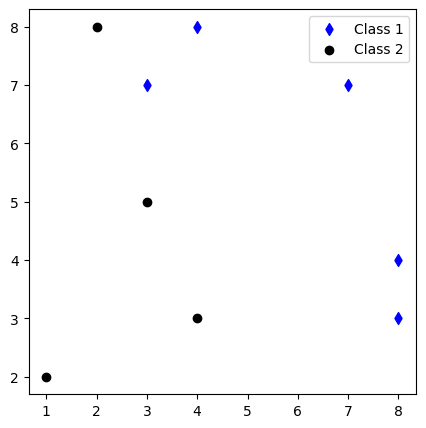

In [13]:
#Plotting the Prediction

class1_color = 'blue'
class2_color = 'black'
plt.figure(figsize=(5, 5))
plt.scatter(x = predictions[predictions[:, 2] == 1][:, 0], y = predictions[predictions[:, 2] == 1][:, 1], marker='d', label='Class 1',c=class1_color)
plt.scatter(x = predictions[predictions[:, 2] == 2][:, 0], y = predictions[predictions[:, 2] == 2][:, 1], marker='o', label='Class 2',c=class2_color)
plt.legend()
plt.show()